1. Pandas

 1. Read the provided CSV file ‘data.csv’.
  
 2. Show the basic statistical description about the data
 
 3. Check if the data has null values.
  
    Replace the null values with the mean
 
 4. Select at least two columns and aggregate the data using: min, max, count, mean.
 
 5. Filter the dataframe to select the rows with calories values between 500 and 1000.
 
 6. Filter the dataframe to select the rows with calories values > 500 and pulse < 100.
 
 7. Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”.
 
 8. Delete the “Maxpulse” column from the main df dataframe
 
 9. Convert the datatype of Calories column to int datatype.
 
 10. Using pandas create a scatter plot for the two columns (Duration and Calories).

In [1]:
import pandas as pd
import numpy as np

# reads the data.csv file and returns the dataframe object which is assignred to 'df'
df = pd.read_csv('data.csv')

# head() method displays first few rows of the dataframe
df.head()
                    

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [2]:
#to check null values.
print(df.isnull().any()) 


Duration    False
Pulse       False
Maxpulse    False
Calories     True
dtype: bool


In [3]:
#replace null values with mean using fillna() method
df.fillna(df.mean(), inplace=True)
df.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories    False
dtype: bool

In [4]:
# aggregate the data using min, max, count, mean for selected columns
agg_data = df.agg({'Duration':['min','max','count','mean'],
                   'Pulse':['min','max','count','mean']})
print(agg_data)

         Duration       Pulse
min     15.000000   80.000000
max    300.000000  159.000000
count  169.000000  169.000000
mean    63.846154  107.461538


In [5]:
# filter the dataframe to select rows with calories values between 500 and 1000
df.loc[(df['Calories'] >= 500) & (df['Calories'] <= 1000)]


,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
83,120,100,130,500.0


In [6]:
# filter the dataframe to select rows with calories > 500 and pulse < 100
df.loc[(df['Calories'] > 500) & (df['Pulse'] < 100)]

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


In [7]:
# create a new df_modified dataframe without the "Maxpulse" column
df_modified = df[['Duration','Pulse','Calories']]
df_modified.head()

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


In [8]:
del df['Maxpulse']

In [9]:
df.head()

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


In [10]:
df.dtypes

Duration      int64
Pulse         int64
Calories    float64
dtype: object

In [11]:
# convert the datatype of Calories column to int datatype
df['Calories'] = df['Calories'].astype(np.int64)
df.dtypes

Duration    int64
Pulse       int64
Calories    int64
dtype: object

<AxesSubplot:xlabel='Duration', ylabel='Calories'>

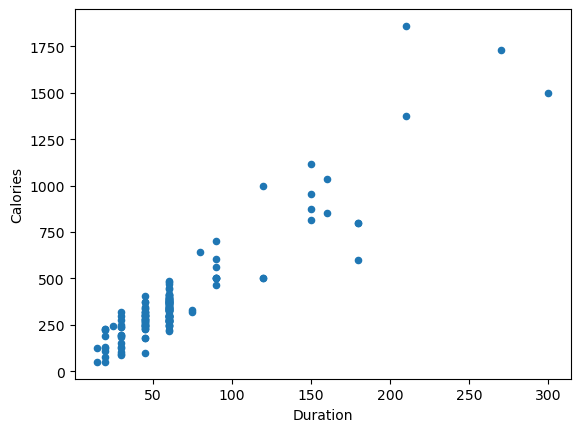

In [12]:
# create a scatter plot for the two columns (Duration and Calories)
df.plot.scatter(x='Duration', y='Calories')

(Titanic Dataset)
1. Find the correlation between ‘survived’ (target column) and ‘sex’ column for the Titanic use case inclass.

a. Do you think we should keep this feature?

2. Do at least two visualizations to describe or show correlations.

3. Implement Naïve Bayes method using scikit-learn library and report the accuracy.

In [ ]:
import pandas as pd
import numpy as np
import random as rnd

import warnings # current version generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import preprocessing


In [14]:
train_data=pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# Calculate the correlation between 'survived' and 'sex' columns

train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


a. Do you think we should keep this feature?

#Answer: In the survived column 300 people survived while most of them died.
 The Sex column shows that there are more number of females than  males in the ship. 

In [17]:
# creating an instance of LabelEncoder class from scikit-learn
label = preprocessing.LabelEncoder()
train_data['Sex'] = label.fit_transform(train_data.Sex.values)
train_data['Survived'].corr(train_data['Sex'])

-0.543351380657755

In [18]:
matrix = train_data.corr()
print(matrix)

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144  0.042939  0.036847 -0.057527   
Survived       -0.005007  1.000000 -0.338481 -0.543351 -0.077221 -0.035322   
Pclass         -0.035144 -0.338481  1.000000  0.131900 -0.369226  0.083081   
Sex             0.042939 -0.543351  0.131900  1.000000  0.093254 -0.114631   
Age             0.036847 -0.077221 -0.369226  0.093254  1.000000 -0.308247   
SibSp          -0.057527 -0.035322  0.083081 -0.114631 -0.308247  1.000000   
Parch          -0.001652  0.081629  0.018443 -0.245489 -0.189119  0.414838   
Fare            0.012658  0.257307 -0.549500 -0.182333  0.096067  0.159651   

                Parch      Fare  
PassengerId -0.001652  0.012658  
Survived     0.081629  0.257307  
Pclass       0.018443 -0.549500  
Sex         -0.245489 -0.182333  
Age         -0.189119  0.096067  
SibSp        0.414838  0.159651  
Parch        1.000000  0.216225  
Fare         0.216225  1.

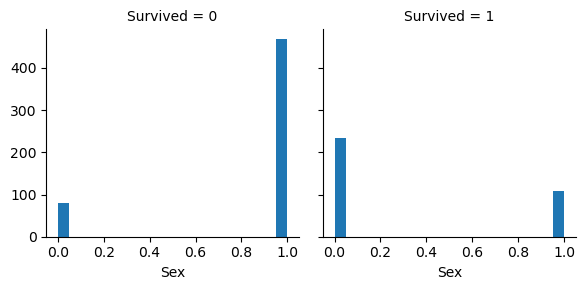

In [19]:
# visualization 1 to show correlations
a = sns.FacetGrid(train_data, col='Survived')
a.map(plt.hist, 'Sex', bins=20)

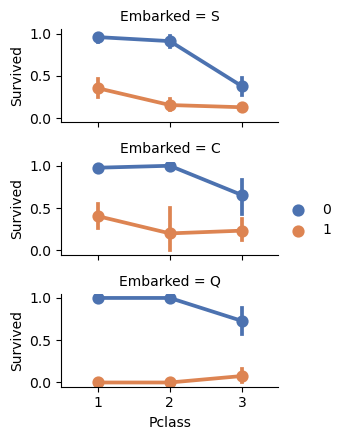

In [20]:
# Visualization 2 to show correlation

# using seaborn library to create FaceGrid plot based on train dataset.
grid = sns.FacetGrid(train_data, row='Embarked', size=1.5, aspect=2)

# map() method to plot each row of the grid
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [21]:
# to generate correlation matrix for train_data dataframe
# and style the matrix with background color "Greens"
train_data.corr().style.background_gradient(cmap="Greens")

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


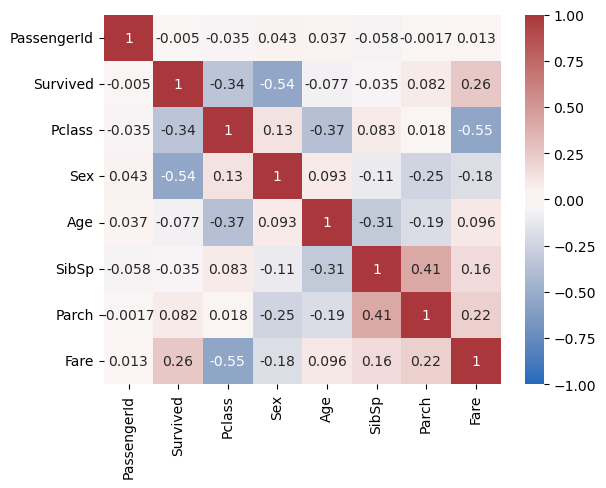

In [22]:
#plot of rectangular data as a color encoded matrix
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [23]:
# Implementing Naïve Bayes method using scikit-learn library and report the accuracy

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [24]:
train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')

# Join data to analyse and process the set as one.
train_raw['train'] = 1
test_raw['train'] = 0
df = train_raw.append(test_raw, sort=False)


features = ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']
target = 'Survived'

df = df[features + [target] + ['train']]
# Categorical values need to be transformed into numeric.
df['Sex'] = df['Sex'].replace(["female", "male"], [0, 1])
df['Embarked'] = df['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])
train = df.query('train == 1')
test = df.query('train == 0')

In [25]:
# Drop missing values from the train set.
train.dropna(axis=0, inplace=True)
labels = train[target].values
train.drop(['train', target, 'Pclass'], axis=1, inplace=True)
test.drop(['train', target, 'Pclass'], axis=1, inplace=True)
from sklearn.model_selection import train_test_split, cross_validate

X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.2, random_state=0)

In [26]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summarising the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.77      0.84      0.80        82
         1.0       0.75      0.66      0.70        61

    accuracy                           0.76       143
   macro avg       0.76      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143

[[69 13]
 [21 40]]
accuracy is 0.7622377622377622


2. (Glass Dataset)

 Implement Naïve Bayes method using scikit-learn library.
 
  a. Use the glass dataset available in Link also provided in your assignment.
  
  b. Use train_test_split to create training and testing part.
  


In [27]:
glass_data=pd.read_csv("glass.csv")
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [28]:
glass_data.corr().style.background_gradient(cmap="Greens")

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [29]:
p=glass_data.iloc[:,:-1].values
q=glass_data['Type'].values

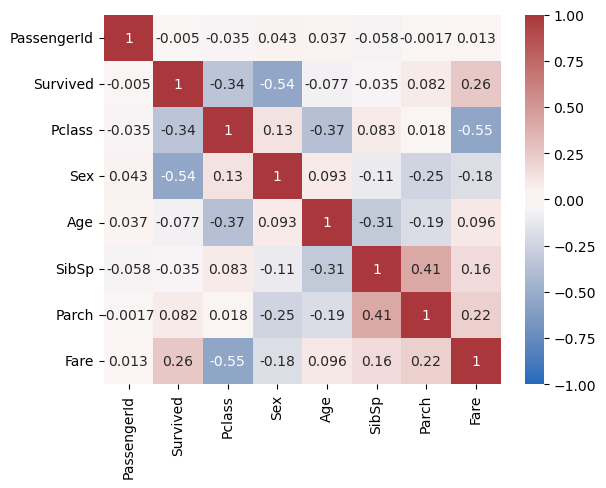

In [30]:
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

1. Evaluate the model on testing part using score and

      Implement linear SVM method using scikit library
  
   a. Use the glass dataset available in Link also provided in your assignment.
   
   b. Use train_test_split to create training and testing part.

In [31]:
# Support Vector Machine
features = ['Rl', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
target = 'Type'

x_train, x_val, y_train, y_val = train_test_split(glass_data[::-1], 
                            glass_data['Type'],test_size=0.2, random_state=1)
from sklearn.svm import SVC, LinearSVC

classifier = LinearSVC()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_val)

# Summary of the predictions made by the classifier
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_val))

              precision    recall  f1-score   support

           1       0.82      0.95      0.88        19
           2       0.78      0.58      0.67        12
           3       1.00      0.67      0.80         6
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.57      1.00      0.73         4

    accuracy                           0.77        43
   macro avg       0.53      0.53      0.51        43
weighted avg       0.77      0.77      0.75        43

[[18  1  0  0  0  0]
 [ 4  7  0  0  1  0]
 [ 0  1  4  0  0  1]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  0  4]]
accuracy is 0.7674418604651163



2.Do at least two visualizations to describe or show correlations in the Glass Dataset. 


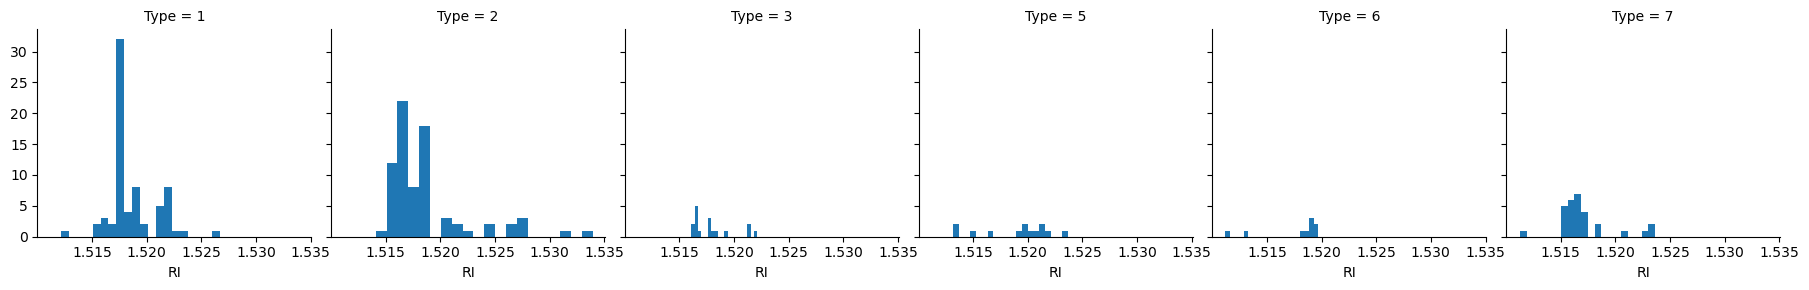

In [32]:
g = sns.FacetGrid(glass_data, col='Type')
g.map(plt.hist,'RI',bins=20)

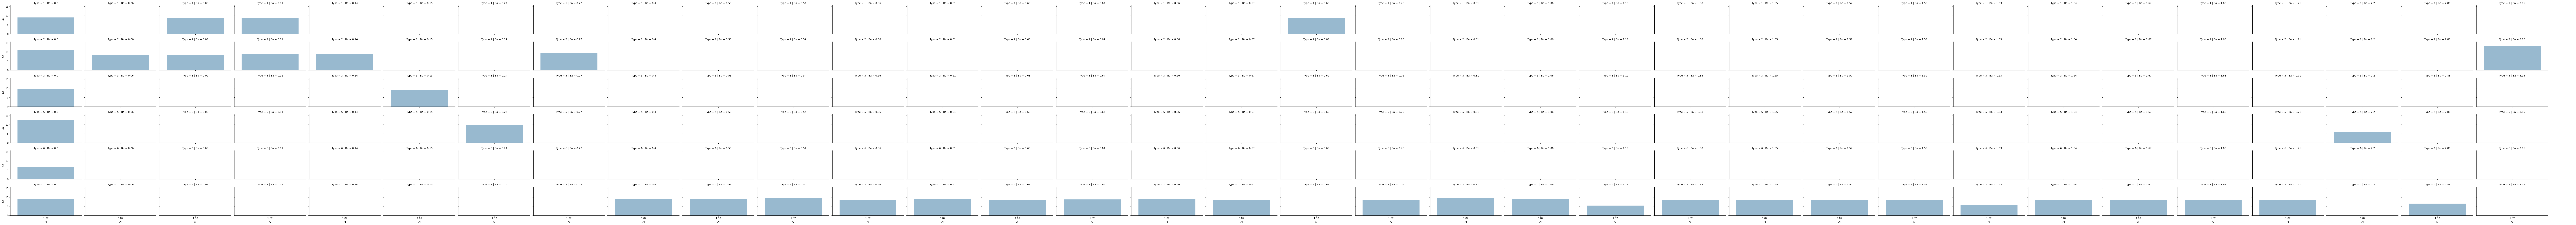

In [38]:
grid = sns.FacetGrid(glass_data, row='Type',col='Ba',height=2.1,aspect=2)
grid.map(sns.barplot,'Al','Ca',alpha=.5,ci=None)
grid.add_legend()

Which algorithm you got better accuracy? Can you justify why?

Answer: When compared with the other algorithms Guassian Naive Bayes algorithm gives better accuracy and this algorith is used when features are not discreet.